<a href="https://colab.research.google.com/github/LuizPaulo97/real-state-prediction-/blob/main/Modelo_de_Regress%C3%A3o_Linear_M%C3%BAltipla_Real_Estate_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook tem a finalidade de apresentar um modelo de regressão linear múltipla construído em Python com o scikit-learn utilizando o dataset *Real State Price* presente no Kaggle através do link: https://www.kaggle.com/datasets/dmvreddy91/usahousing?resource=download

## Importando as bibliotecas utilizadas e o dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/LuizPaulo97/real-state-prediction-/main/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Análise do Dataset

Foi inicialmente feito um breve levantamento das principais estatísticas de medida de tendência central e de dispersão das variáveis presentes no dataset.

In [ ]:
df.shape
df.describe().round(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


Foi também realizada uma importante observação entre as correlações de todas as variáveis. Tal análise foi importante para entender como o preço da casa se comportava em relação a cada variável.

Vale ressaltar que no entanto, a correlação **não** implica em **causalidade.**

[Text(0.5, 1.0, 'Mapa de Calor do preço da casa por unid. de área - Pearson Correlations')]

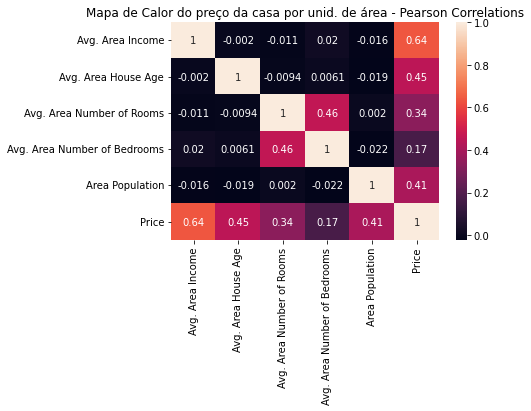

In [ ]:
#Mapa de calor da correlação entre as variáveis
features = df.drop('Address', axis=1)
correlations = features.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Mapa de Calor do preço da casa por unid. de área - Pearson Correlations')

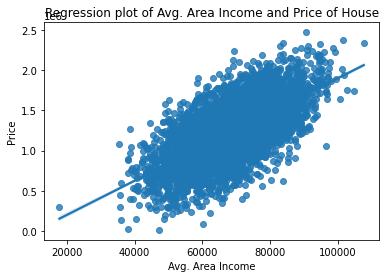

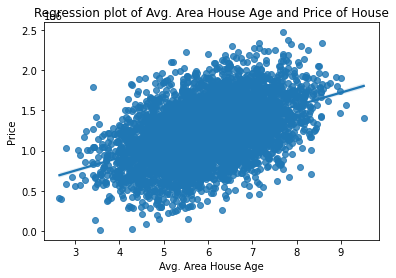

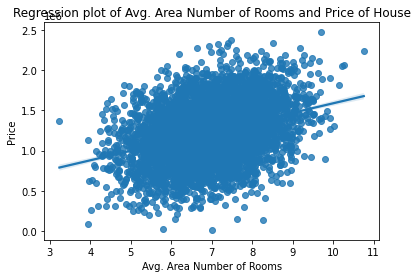

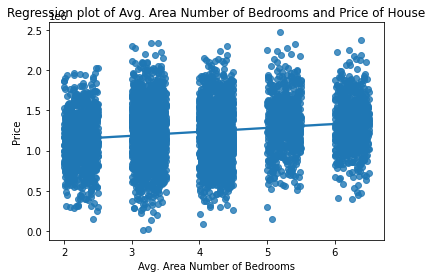

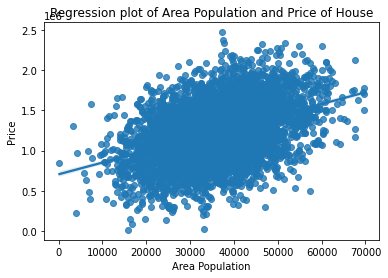

In [ ]:
variables = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Price', data=df).set(title=f'Regression plot of {var} and Price of House');

## Preparação do dataset para o treinamento do modelo

Inicialmente, os dados apresentados no dataset foram separados em duas matrizes: X e Y.

In [ ]:
#Preparando os dados para a regressão
X = df.drop('Address', axis = 1)
X = X.drop('Price', axis = 1) #variáveis do modelo (X_{i})
X_ = X.values #variáveis do modelo (X_{i})
y = df[['Price']].values

#print(X)
#print(y)

Após a separação, foi definido qual parte da massa de dados serviria como training set (dados de treinamento para o modelo) e test set (dados que servirão para da medição de acurácia do modelo).

Como é comum no desenvolvimento de modelos de regressão, foi definido que 20% do dataset será utilizado para o teste do modelo enquanto que 80% será utilizado para o treinamento do algoritmo.

In [ ]:
#Dividindo o dataset em training set e test set
seed = df[['Avg. Area Income']].mean()
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.20, random_state = 0 )

## Treinamento e Regressão Linear Múltipla

Por meio das funções *regressor.intercept_* e *regressor.coef_* é possível encontrar os coeficientes ótimos do modelo.

O coeficiente teta 0 é apresentado como intersseção. Já os demais coeficientes são apresentados no dataframe abaixo.

In [ ]:
#Treinando o modelo de regressão múltipla
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Interseção",regressor.intercept_)
z = regressor.coef_
#for (x,y), value in np.ndenumerate(z):
  #print (x,y)
l =[]
for i in range (1):
  for j in range (5):
    l.append(z[i,j])

features_names = X.columns
coefficients_df = pd.DataFrame(data = l, 
                              index = features_names,
                              columns = ['Coefficient value'])
display(coefficients_df)

Interseção [-2646630.53105592]


,Coefficient value
Avg. Area Income,21.660408
Avg. Area House Age,165809.651149
Avg. Area Number of Rooms,120329.407877
Avg. Area Number of Bedrooms,2193.095579
Area Population,15.285885


In [ ]:
#Fazendo a predição utilizando os valores de X test set
y_pred = regressor.predict(X_test)
print(y_pred)

[[ 971305.2171559 ]
 [ 954717.19848518]
 [ 907561.62786801]
 [ 493251.36603036]
 [ 717846.54075562]
 [1050147.83569695]
 [ 712749.72523196]
 [ 786730.40828389]
 [1804401.07723571]
 [1538824.53251443]
 [ 743185.11443127]
 [1145962.64546487]
 [2121930.18782562]
 [ 974081.46956725]
 [1152109.89196311]
 [ 875083.71232262]
 [1105054.72869039]
 [ 801503.1250512 ]
 [1205004.3293566 ]
 [1408921.31567665]
 [1140508.64862889]
 [1063287.89778645]
 [1436698.66412556]
 [1176185.01193252]
 [1297298.51186765]
 [1120654.65101339]
 [1118341.02405207]
 [1372882.33712618]
 [1589401.18137742]
 [1194289.3119116 ]
 [1562677.3593149 ]
 [2007793.98911753]
 [ 891709.15981123]
 [1326060.16200967]
 [1184356.85325292]
 [ 749141.688065  ]
 [1082944.09149544]
 [1579298.12680207]
 [1260383.5718463 ]
 [1334423.40010873]
 [1596862.94057498]
 [ 961444.39684258]
 [1219893.21685579]
 [1115884.15833105]
 [1034764.41129303]
 [1702297.11628962]
 [1016847.82240769]
 [1618322.2183224 ]
 [1153795.04960977]
 [1382385.98827114]


## Avaliação do modelo

Através da biblioteca sklearn.metrics, é possível importar a função r2_score que fornece a acurácia percentual do modelo. Neste caso, o modelo construído possui uma acurácia de 91.4% para previsões.

In [ ]:
#Avaliando o modelo
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9146454505138071

Como pode-se observar pelo gráfico de dispersão (scatter plot), a correlação entre o y_test e o y_pred é relativamente alta. Com isso, os pontos estão com baixa dispersão entre si. Por isso, é possível afirmar que este modelo, com score de 91.4% seria um modelo preciso de regressão. Entretanto, uma abordagem com diferentes modelos não deve ser descartada.

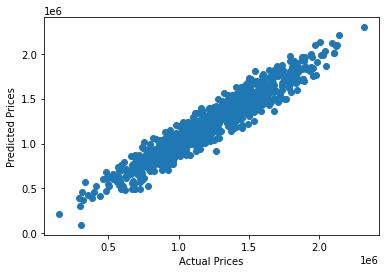

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()